# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code.

Split the X_train, Y_train into train and validation based on an 80:20 split. For a given dataset, kernel parameter and regularisation value run gradient descent on the regularised kernel logistic loss on training set, with some learning rate eta. Try different etas, and choose the best eta (the eta that achieves the lowest R(alpha)), based on the alpha  you get after 1000 iterations.

For the classification data sets A and B, report the best kernel and regularisation parameters for the RBF kernel.  Choose the best kernel and regularisation parameter based on the accuracy of the model given by the optimisation procedure. Report the training and test zero-one error (or 1-accuracy) for those hyperparameters. 

For both  the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.


In [2]:
def train_pred_logistic_regression(X_train, Y_train, X_test, kernel='linear', reg_param=0,kernel_param=1., num_iter_gd=10):
    n = np.shape(X_train)[0]
    #lin_ker  = np.dot(X_train,np.transpose(X_train))
    #poly_ker = (1+lin_ker)**kernel_param
    ker = np.zeros((n,n))
    # for creating rbf kernel
    for i in range(n):
        #k = [np.linalg.norm((X_train[i]-j))**2 for j in X_train] # actual formula
        
        k = np.linalg.norm((X_train[i]-X_train),axis=1)**2   # for fast computation
        #print(k)
        ker[i,:]=k
    
    rbf_ker  = np.exp(-kernel_param*ker)
    #if (kernel == 'linear'):
    #    kernel = lin_ker
        
    #elif(kernel == 'poly'):
    #    kernel = poly_ker
        
    #else :
    kernel = rbf_ker
    
    #print(kernel)
    Y_train = Y_train.reshape((n,1))
    # set alpha initially
    alpha = np.zeros((np.shape(X_train)[0],1))
    eta = 1
    #As per formula
    for iterat in range(num_iter_gd):
        DR_alpha = reg_param*np.dot(kernel,alpha)
        #print(np.shape(DR_alpha))
        for i in range(n):
            temp      =  -1/(1+np.exp(Y_train[i]*np.dot(np.transpose(alpha),kernel[:,i])))*Y_train[i]*kernel[:,i]
            temp=temp/n
            DR_alpha = DR_alpha + temp.reshape(n,1)
        #print(DR_alpha)
        alpha = alpha - eta*DR_alpha
    #print(alpha)
    # predict Y_test
    y_pred =[]
    for i in range(np.shape(X_test)[0]):       
        k = np.exp(-kernel_param*np.linalg.norm((X_test[i]-X_train),axis=1)**2 )  # for fast computation
        t = np.dot(np.transpose(alpha),k) # checking the value of u in sigma(u)
        if(t>=0):
            y_pred.append(1)
        else :
            y_pred.append(-1)
    
    
    return(y_pred)
    
def return_best_hyperparam( X_train,Y_train,X_valid,Y_valid): # give appropriate arguments, return appropriate variables
    ker_par_range = [1e-9,1e-5,1e-1,1,1e3,1e7]
    reg_par_range = [0,1e-9,1e-5,1e-1,1,1e3,1e5]
    corr_pred = 0
    best_ker_par = 0
    best_reg_par = 0
    for reg_par in reg_par_range :
        for ker_par in ker_par_range :
            y_pred = train_pred_logistic_regression(X_train,Y_train,X_valid,kernel ='rbf',reg_param = reg_par,kernel_param = ker_par)
            temp = np.count_nonzero((y_pred-Y_valid == 0))
            if(temp > corr_pred):
                corr_pred = temp
                best_ker_par = ker_par
                best_reg_par = reg_par
    return(best_ker_par,best_reg_par)



In [3]:
# CodeWrite : Use the functions above to get the numbers you report below. 

data_names = ["./Archive/dataset_A.npz","./Archive/dataset_B.npz","./Archive/dataset_C.npz","./Archive/dataset_D.npz"];
name_print = ['DataSet-A', 'DataSet-B', 'DataSet-C', 'DataSet-D'];
for i in range(len(data_names)) :
    data_name = data_names[i];
    data = np.load(data_name)
    #print(data['arr_1'])
    X_train_dat = data['arr_0']
    Y_train_dat = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']
    #splitting the data
    X_train = X_train_dat[0:np.int(0.8*np.shape(X_train_dat)[0])]
    Y_train = Y_train_dat[0:np.int(0.8*np.shape(Y_train_dat)[0])]
    X_valid = X_train_dat[np.int(0.8*np.shape(X_train_dat)[0]):]
    Y_valid = Y_train_dat[np.int(0.8*np.shape(Y_train_dat)[0]):] 
    
    print(name_print[i])
    print()
    
    best_ker_par,best_reg_par = return_best_hyperparam(X_train,Y_train,X_valid,Y_valid);
    
    print("Best Kernel Parameter  " + " = ", best_ker_par);
    print("Best Reg Parameter  " + " = ", best_reg_par);
    
    # testing accuracy and zero-error
    te_y_pred = train_pred_logistic_regression(X_train,Y_train,X_test,kernel = 'rbf',kernel_param =best_ker_par,reg_param = best_reg_par)
    print("testing accuracy "  + " = ",np.count_nonzero((te_y_pred-Y_test)==0)/len(Y_test)*100);    
    print("test Zero-One "  + " = ",np.count_nonzero((te_y_pred-Y_test!=0)));    
    # training zero-error
    tr_y_pred = train_pred_logistic_regression(X_train,Y_train,X_train_dat,kernel = 'rbf',kernel_param =best_ker_par,reg_param = best_reg_par)
    print("training accuracy  " + " = ",np.count_nonzero((tr_y_pred-Y_train_dat)==0)/len(Y_train_dat)*100);    
    print("Train Zero-One Loss "  + " = ",np.count_nonzero(tr_y_pred-Y_train_dat!=0))
    print()

DataSet-A



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


Best Kernel Parameter   =  1000.0
Best Reg Parameter   =  0
testing accuracy  =  99.8
test Zero-One  =  1
training accuracy   =  100.0
Train Zero-One Loss  =  0

DataSet-B

Best Kernel Parameter   =  1000.0
Best Reg Parameter   =  0.1
testing accuracy  =  77.60000000000001
test Zero-One  =  112
training accuracy   =  90.2
Train Zero-One Loss  =  147

DataSet-C

Best Kernel Parameter   =  0.1
Best Reg Parameter   =  0
testing accuracy  =  96.63299663299664
test Zero-One  =  10
training accuracy   =  99.86666666666667
Train Zero-One Loss  =  2

DataSet-D

Best Kernel Parameter   =  0.1
Best Reg Parameter   =  0
testing accuracy  =  85.20710059171599
test Zero-One  =  25
training accuracy   =  96.75
Train Zero-One Loss  =  13



TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

| Logistic Regression | Reg_Param | Kernel-Param | Train-Loss | Test-Loss |
|---------------------|:---------:|--------------|------------|----------:|
| Data-Set-A          |     0     | 1000         | 0          |     1     |
| Data-Set-B          |    0.1    | 1000         | 147        |    112    |
| Data-Set-C          |     0     | 0.1          | 2          |     10    |
| Data-Set-D          |     0     | 0.1          | 13         |     25    |




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


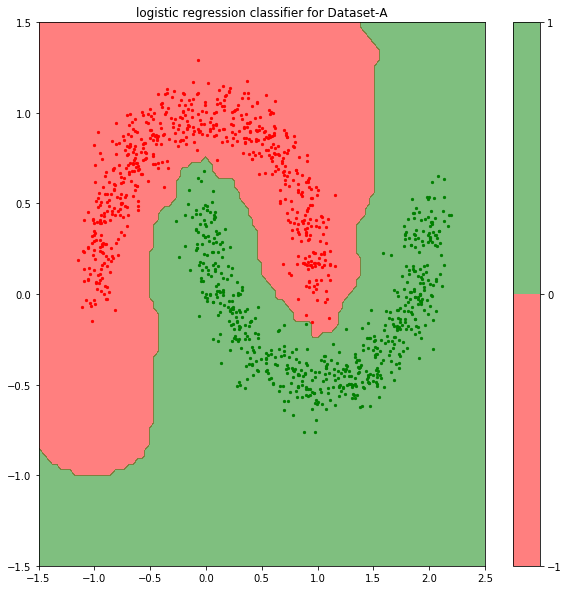

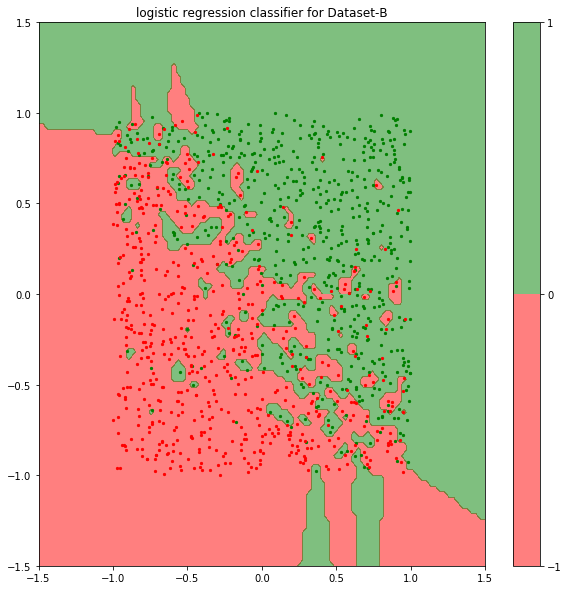

In [4]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and dataset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

##====== plotting ==============================================
data_names = ["./Archive/dataset_A.npz","./Archive/dataset_B.npz"]
DataSet = ['Dataset-A','Dataset-B']
for m in range(len(data_names)) :
    data = np.load(data_names[m])
    #print(data['arr_1'])
    X_train_dat = data['arr_0']
    Y_train_dat = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']
    #splitting the data
    X_train = X_train_dat[0:np.int(0.8*np.shape(X_train_dat)[0])]
    Y_train = Y_train_dat[0:np.int(0.8*np.shape(Y_train_dat)[0])]
    X_valid = X_train_dat[np.int(0.8*np.shape(X_train_dat)[0]):]
    Y_valid = Y_train_dat[np.int(0.8*np.shape(Y_train_dat)[0]):]

    X_train_plus = np.array([X_train_dat[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_minus = np.array([X_train_dat[i] for i in range(len(Y_train)) if Y_train[i]==-1])
    
    best_ker_par,best_reg_par = return_best_hyperparam(X_train,Y_train,X_valid,Y_valid)
    
    # limits for plotting
    max_0  = round(np.max(X_train_dat[:,0]))+0.5
    min_0  = round(np.min(X_train_dat[:,0]))-0.5
    lim_0  = np.linspace(min_0,max_0,100)
    max_1   = round(np.max(X_train_dat[:,1]))+0.5
    min_1   = round(np.min(X_train_dat[:,1]))-0.5
    lim_1  = np.linspace(min_1,max_1,100)
    
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)
    
    Y_test_gr_rbf = np.zeros(X_test_1.shape)
    
    # total X_test
    X_test_tot = np.array([])
    for i in range(Y_test_gr_rbf.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_rbf.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        #Y_test_gr_rbf[i,:] = train_pred_logistic_regression(X_train,Y_train,X_test_gr,kernel = 'rbf',kernel_param =best_ker_par,reg_param = best_reg_par)
        if(i ==0) :
            X_test_tot = X_test_gr
        else :
            X_test_tot = np.concatenate((X_test_tot,X_test_gr))
    Y_test_gr = train_pred_logistic_regression(X_train,Y_train,X_test_tot,kernel = 'rbf',kernel_param =best_ker_par,reg_param = best_reg_par)
    Y_test_gr_rbf = np.reshape(Y_test_gr,X_test_1.shape)
    plt.figure(figsize=(10,10))
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_rbf,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.title('logistic regression classifier '+'for '+ DataSet[m])
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d)    
    


# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the via using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set (dataset A,B,C,D) report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [5]:
# CodeWrite cell
# Write SVM classifier using SKlearn, write code for choosing best hyper parameters.
# write only functions here
def linear_kernel(reg_param, X_train, Y_train, X_test, Y_test):
    classif_algo =  SVC(C = reg_param, kernel='linear');
    classifier = classif_algo.fit(X_train ,Y_train);
    return classifier.score(X_test, Y_test);
#     Y_pred = classifier.predict(X_test);
#     count = 0;
#     for i in range(len(Y_test)):
#         if(Y_pred[i] == Y_test[i]):
#             count += 1;
#     return count/len(Y_test);

def rbf_kernel(reg_param, kernel_param, X_train, Y_train, X_test, Y_test):
    classif_algo =  SVC(C = reg_param, gamma = kernel_param);
    classifier = classif_algo.fit(X_train ,Y_train);
    return classifier.score(X_test, Y_test);

def poly_kernel(reg_param, kernel_degree, X_train, Y_train, X_test, Y_test):
    classif_algo =  SVC(C = reg_param, kernel = 'poly', degree=kernel_degree, gamma='auto', coef0 = 1.0);
    classifier = classif_algo.fit(X_train ,Y_train);
    return classifier.score(X_test, Y_test);

def linear_kernel_predict(reg_param, X_train, Y_train, X_test):
    classif_algo =  SVC(C = reg_param, kernel='linear');
    classifier = classif_algo.fit(X_train ,Y_train);
    Y_pred = classifier.predict(X_test);
    return Y_pred;
#     count = 0;
#     for i in range(len(Y_test)):
#         if(Y_pred[i] == Y_test[i]):
#             count += 1;
#     return count/len(Y_test);

def rbf_kernel_predict(reg_param, kernel_param, X_train, Y_train, X_test):
    classif_algo =  SVC(C = reg_param, gamma = kernel_param);
    classifier = classif_algo.fit(X_train ,Y_train);
    Y_pred = classifier.predict(X_test);
    return Y_pred;

def poly_kernel_predict(reg_param, kernel_degree, X_train, Y_train, X_test):
    classif_algo =  SVC(C = reg_param, kernel = 'poly', degree=kernel_degree, gamma='auto', coef0 = 1.0);
    classifier = classif_algo.fit(X_train ,Y_train);
    Y_pred = classifier.predict(X_test);
    return Y_pred;



In [6]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.
data_names = ["./Archive/dataset_A.npz","./Archive/dataset_B.npz","./Archive/dataset_C.npz"]
name_print = ['DataSet-A', 'DataSet-B', 'DataSet-C', 'DataSet-D'];
for i in range(len(data_names)) :
    data_name = data_names[i];
    data = np.load(data_name);
    print("----------------------------------- " + name_print[i] + " -------------------------------------------- ");
    print("\n");
    #print(data['arr_1'])
    X_train_dat = data['arr_0']
    Y_train_dat = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']
    #splitting the data
    X_train = X_train_dat[0:np.int(0.8*np.shape(X_train_dat)[0])]
    Y_train = Y_train_dat[0:np.int(0.8*np.shape(Y_train_dat)[0])]
    X_valid = X_train_dat[np.int(0.8*np.shape(X_train_dat)[0]):]
    Y_valid = Y_train_dat[np.int(0.8*np.shape(Y_train_dat)[0]):]
    linear_score = 0;
    reg_param_linear = 0;
    
    # choosing the best parameters
    for reg_param in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]:
        score = linear_kernel(reg_param, X_train, Y_train, X_valid, Y_valid)
        if(score > linear_score):
            linear_score = score;
            reg_param_linear = reg_param;

    print("Reg_Param_Linear: ", reg_param_linear);
    print("Train Accuracy Linear Kernel: ", 100 * linear_kernel(reg_param_linear, X_train, Y_train, X_train, Y_train));
    print("Test Accuracy Linear Kernel: ", 100 * linear_kernel(reg_param_linear, X_train, Y_train, X_test, Y_test));
    print("Train Zero_One Error Linear Kernel: ", 100 * (1-linear_kernel(reg_param_linear, X_train, Y_train, X_train, Y_train)));
    print("Test Zero_One Error Linear Kernel: ", 100 * (1-linear_kernel(reg_param_linear, X_train, Y_train, X_test, Y_test)));
    print()
    rbf_score = 0;
    reg_param_rbf = 0;
    gamma_rbf = 0;
    
    #choosing the best parameters
    for reg_param in [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]:
        for gamma in [0.0001, 0.01, 0.1, 1, 5, 10, 50, 100]:
            score = rbf_kernel(reg_param, gamma, X_train, Y_train, X_valid, Y_valid)
            if(score > rbf_score):
                rbf_score = score;
                reg_param_rbf = reg_param;
                gamma_rbf = gamma;

    print("Reg_Param_rbf: ", reg_param_rbf);
    print("Gamma_Param_rbf: ", gamma_rbf);
    print("Train Accuracy RBF Kernel: ", 100 * rbf_kernel(reg_param_rbf, gamma_rbf, X_train, Y_train, X_train, Y_train));
    print("Test Accuracy RBF Kernel: ", 100 * rbf_kernel(reg_param_rbf, gamma_rbf, X_train, Y_train, X_test, Y_test));
    print("Train Zero_One RBF Kernel: ", 100 * (1-rbf_kernel(reg_param_rbf, gamma_rbf, X_train, Y_train, X_train, Y_train)));
    print("Test Zero_One RBF Kernel: ", 100 * (1-rbf_kernel(reg_param_rbf, gamma_rbf, X_train, Y_train, X_test, Y_test)));
    print()
    poly_score = 0;
    reg_param_poly = 0;
    degree_poly = 0;

    for reg_param in [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]:
        for degree in range(3, 12):
            score = poly_kernel(reg_param, degree, X_train, Y_train, X_valid, Y_valid)
            if(score > poly_score):
                poly_score = score;
                reg_param_poly = reg_param;
                degree_poly = degree;

    print("Reg_Param_Poly: ", reg_param_poly);
    print("Degree_Poly: ", degree_poly);
    print("Train Accuracy Poly Kernel: ", 100 * poly_kernel(reg_param_poly, degree_poly, X_train, Y_train, X_train, Y_train));
    print("Test Accuracy Poly Kernel: ", 100 * poly_kernel(reg_param_poly, degree_poly, X_train, Y_train, X_test, Y_test));
    print("Train Zero_One Poly Kernel: ", 100 * (1-poly_kernel(reg_param_poly, degree_poly, X_train, Y_train, X_train, Y_train)));
    print("Test Zero_One Poly Kernel: ", 100 * (1-poly_kernel(reg_param_poly, degree_poly, X_train, Y_train, X_test, Y_test)));
    print()


----------------------------------- DataSet-A -------------------------------------------- 


Reg_Param_Linear:  0.5
Train Accuracy Linear Kernel:  87.5833333333
Test Accuracy Linear Kernel:  87.8
Train Zero_One Error Linear Kernel:  12.4166666667
Test Zero_One Error Linear Kernel:  12.2

Reg_Param_rbf:  0.05
Gamma_Param_rbf:  50
Train Accuracy RBF Kernel:  99.9166666667
Test Accuracy RBF Kernel:  99.8
Train Zero_One RBF Kernel:  0.0833333333333
Test Zero_One RBF Kernel:  0.2

Reg_Param_Poly:  0.05
Degree_Poly:  8
Train Accuracy Poly Kernel:  100.0
Test Accuracy Poly Kernel:  99.6
Train Zero_One Poly Kernel:  0.0
Test Zero_One Poly Kernel:  0.4

----------------------------------- DataSet-B -------------------------------------------- 


Reg_Param_Linear:  0.005
Train Accuracy Linear Kernel:  80.25
Test Accuracy Linear Kernel:  80.6
Train Zero_One Error Linear Kernel:  19.75
Test Zero_One Error Linear Kernel:  19.4

Reg_Param_rbf:  0.05
Gamma_Param_rbf:  10
Train Accuracy RBF Kernel:  

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

# List of hyper parameters

### Linear Kernel:

| Linear kernel | Reg_Param(C) | Train-Accuracy | Test-Accuracy |
|---------------|:------------:|---------------:|---------------|
| Data-Set A    |      0.5     |      87.58     |      87.8     |
| Data-Set B    |     0.005    |      80.25     |      80.6     |
| Data-Set C    |    0.0001    |      91.5      |     88.88     |
| Data-Set D    |       1      |      96.25     |     94.08     |

### RBF Kernel:

| RBF kernel | Reg_Param(C) | Gamma  | Train-Accuracy | Test-Accuracy |
|------------|:------------:|--------|---------------:|---------------|
| Data-Set A |     0.05     | 50     |      99.91     |      99.8     |
| Data-Set B |     0.05     | 10     |      81.5      |      81.0     |
| Data-Set C |      10      | 0.0001 |      100.0     |     96.96     |
| Data-Set D |       5      | 0.0001 |      97.18     |     94.08     |

### Poly Kernel

| Poly kernel | Reg_Param(C) | Degree | Train-Accuracy | Test-Accuracy |
|-------------|:------------:|--------|---------------:|---------------|
| Data-Set A  |     0.05     | 8      |       100      |      99.6     |
| Data-Set B  |      10      | 11     |      81.41     |     80.80     |
| Data-Set C  |    0.0001    | 4      |       100      |     96.96     |
| Data-Set D  |              |        |                |               |


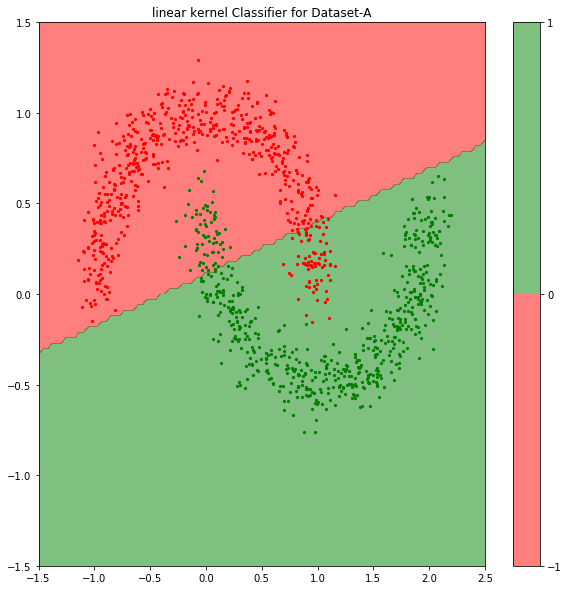

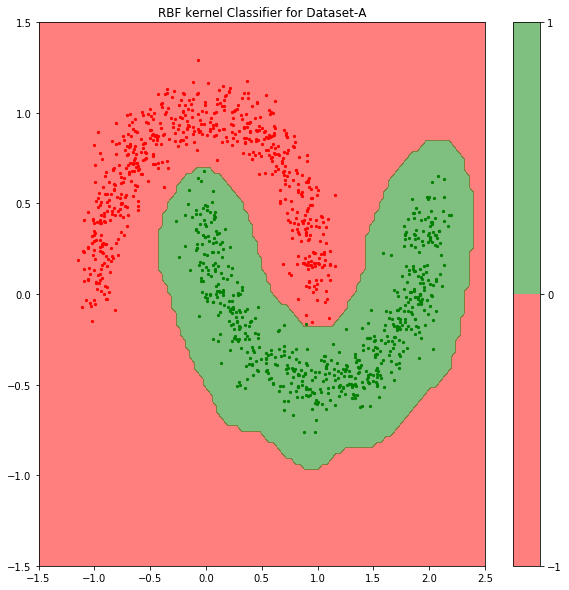

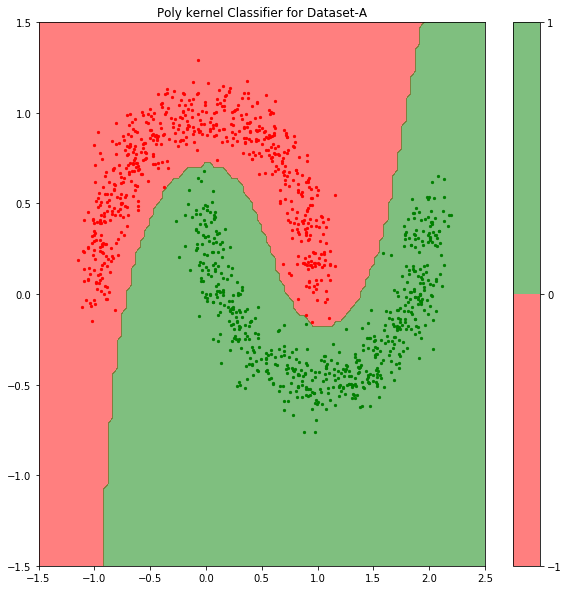

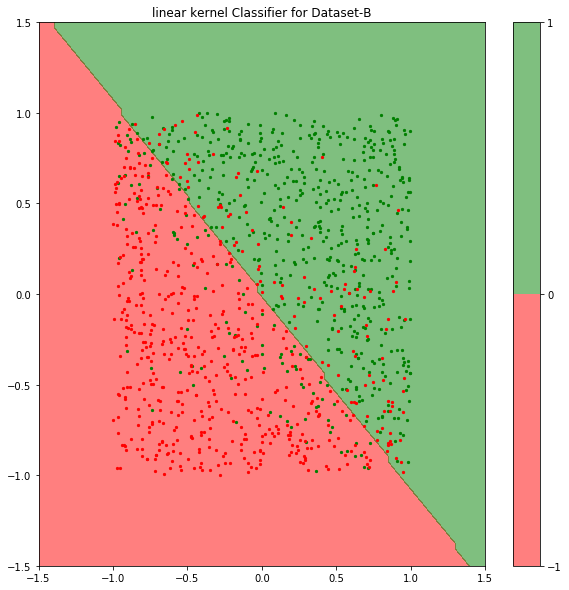

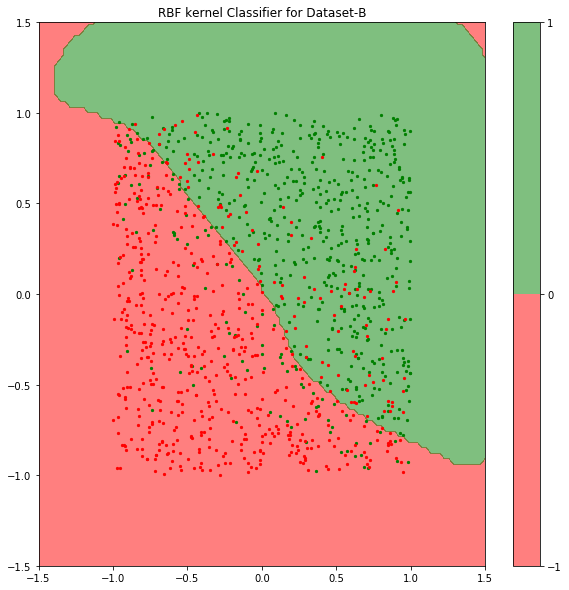

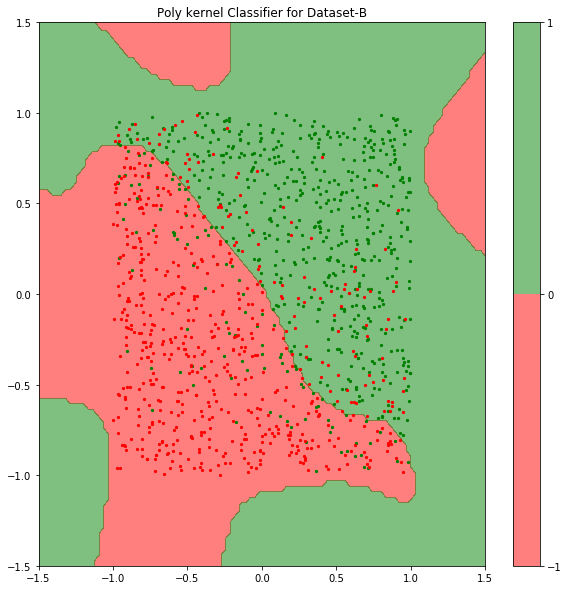

In [6]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

##====== plotting ==============================================
data_names = ["./Archive/dataset_A.npz","./Archive/dataset_B.npz"]
lin_reg_par =[0.5,0.05]
rbf_reg_par =[0.05,0.05]
poly_reg_par =[0.05,10]
Gamma       = [50,10]
Degree      = [8,11]
DataSet = ['Dataset-A','Dataset-B']
for m in range(len(data_names)) :
    data = np.load(data_names[m])
    #print(data['arr_1'])
    X_train_dat = data['arr_0']
    Y_train_dat = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']
    #splitting the data
    X_train = X_train_dat[0:np.int(0.8*np.shape(X_train_dat)[0])]
    Y_train = Y_train_dat[0:np.int(0.8*np.shape(Y_train_dat)[0])]
    X_valid = X_train_dat[np.int(0.8*np.shape(X_train_dat)[0]):]
    Y_valid = Y_train_dat[np.int(0.8*np.shape(Y_train_dat)[0]):]

    X_train_plus = np.array([X_train_dat[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_minus = np.array([X_train_dat[i] for i in range(len(Y_train)) if Y_train[i]==-1])
    
    
    # limits for plotting
    max_0  = round(np.max(X_train_dat[:,0]))+0.5
    min_0  = round(np.min(X_train_dat[:,0]))-0.5
    lim_0  = np.linspace(min_0,max_0,100)
    max_1   = round(np.max(X_train_dat[:,1]))+0.5
    min_1   = round(np.min(X_train_dat[:,1]))-0.5
    lim_1  = np.linspace(min_1,max_1,100)
    
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)
    
    Y_test_gr_lin = np.zeros(X_test_1.shape)
    Y_test_gr_rbf = np.zeros(X_test_1.shape)
    Y_test_gr_pol = np.zeros(X_test_1.shape)
    
    # total X_test
    X_test_tot = np.array([])
    for i in range(Y_test_gr_rbf.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_rbf.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        #Y_test_gr_rbf[i,:] = train_pred_logistic_regression(X_train,Y_train,X_test_gr,kernel = 'rbf',kernel_param =best_ker_par,reg_param = best_reg_par)
        if(i ==0) :
            X_test_tot = X_test_gr
        else :
            X_test_tot = np.concatenate((X_test_tot,X_test_gr))
    Y_test_gr = linear_kernel_predict(lin_reg_par[m],X_train,Y_train,X_test_tot)
    Y_test_gr_lin = np.reshape(Y_test_gr,X_test_1.shape)
    plt.figure(figsize=(10,10))
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_lin,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.title('linear kernel Classifier '+'for '+ str(DataSet[m]))
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d) 
    
    Y_test_gr = rbf_kernel_predict(rbf_reg_par[m],Gamma[m],X_train,Y_train,X_test_tot)
    Y_test_gr_rbf = np.reshape(Y_test_gr,X_test_1.shape)
    plt.figure(figsize=(10,10))
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_rbf,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d) 
    plt.title('RBF kernel Classifier '+'for '+ str(DataSet[m]))
    
    Y_test_gr = poly_kernel_predict( poly_reg_par[m], Degree[m], X_train , Y_train , X_test_tot)
    Y_test_gr_pol = np.reshape(Y_test_gr,X_test_1.shape)
    plt.figure(figsize=(10,10))
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_pol,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.title('Poly kernel Classifier '+'for '+ str(DataSet[m]))
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d) 

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Choose the number of training points at which you stop splitting the node further between 1,10 and 50. You are NOT allowed to use sklearn modules for this.)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For the classification data sets A and B report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

Also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [8]:
# CodeWrite cell
# Write Decision tree classifier from scratch, write code for choosing best node size to stop splitting.
# write only functions here
no_node = 0;
node_size = 2;
tree = {};

tree_root = (0, 0, 0);

def find_best_split(array):
    if(len(array) < node_size):
        sum_result = 0;
        class_classify = "Nothing To Classify"
        for point in array:
            sum_result += point[-1];
        if(sum_result < 0):
            class_classify = -1;
        else:
            class_classify = 1;
        return (no_node, None, None, None, None, None, class_classify, class_classify);
    max_feature_value = np.amax(array, axis=0);
    min_featur e_value = np.amin(array, axis=0);
    no_divisions = 10;
    division_size =(max_feature_value - min_feature_value)/20;
    max_accuracy = 0;
    max_right = [];
    max_left = [];
    max_split = 0;
    max_feature = 0;
    class_right = 0;
    class_left = 0;
    for feature in range(len(array[0]) - 1):
        for i in range(no_divisions + 1):
            right = [];
            left = [];
            for point in array:
                if(point[feature] >= (i*division_size[feature] + min_feature_value[feature])):
                    right.append(point);
                else:
                    left.append(point);
            correctly_classified_1 = 0;
            for point in right:
                if(point[-1] == 1):
                    correctly_classified_1 += 1;
            for point in left:
                if(point[-1] == -1):
                    correctly_classified_1 += 1;
            correctly_classified_2 = 0;
            for point in right:
                if(point[-1] == -1):
                    correctly_classified_2 += 1;
            for point in left:
                if(point[-1] == +1):
                    correctly_classified_2 += 1;
            accuracy = max(correctly_classified_1, correctly_classified_2)/len(array);
            if(accuracy > max_accuracy and len(right) > 0 and len(left) > 0):
                max_accuracy = accuracy;
                max_right = right;
                max_left = left;
                max_split = (i*division_size[feature] + min_feature_value[feature]);
                max_feature = feature;
                if(correctly_classified_1 >= correctly_classified_2):
                    class_right = 1;
                    class_left = -1;
                else:
                    class_right = -1;
                    class_left = 1;
    if(max_accuracy == 1):
        return (no_node, max_left, max_right, max_feature, max_split, max_accuracy, class_left, class_right);

    return (no_node, max_left, max_right, max_feature, max_split, max_accuracy, None, None);

def learn_tree(hyper_node_size, dataset):
    global no_node;
    global tree_root;
    global tree;
    modified_dataset = dataset['arr_0'][0: int(0.8*len(dataset['arr_0']))];
    array_array = [];
    for result in dataset['arr_1'][0: int(0.8*len(dataset['arr_1']))]:
        array_array.append([result]); 
    modified_dataset = np.append(modified_dataset, array_array, axis = 1);
    node = find_best_split(modified_dataset);
    node_size = hyper_node_size;

    tree_root = (node[0], node[3], node[4]);

    tree[(node[0], node[3], node[4])] = {
        'l_child': None,
        'r_child': None,
        'l_data': node[1],
        'r_data': node[2],
        'l_class': node[6],
        'r_class': node[7],
    };
    queue = [];
    queue.append((node[0], node[3], node[4]));
    while(len(queue) > 0):
        if(tree[queue[0]]['l_class'] == None):
            no_node += 1;
            node = find_best_split(tree[queue[0]]['l_data']);
            tree[(node[0], node[3], node[4])] = {
                'l_child': None,
                'r_child': None,
                'l_data': node[1],
                'r_data': node[2],
                'l_class': node[6],
                'r_class': node[7],
            };
            tree[queue[0]]['l_child'] = (node[0], node[3], node[4]);
            queue.append((node[0], node[3], node[4]));
        if(tree[queue[0]]['r_class'] == None):
            no_node += 1;
            node = find_best_split(tree[queue[0]]['r_data']);
            tree[(node[0], node[3], node[4])] = {
                'l_child': None,
                'r_child': None,
                'l_data': node[1],
                'r_data': node[2],
                'l_class': node[6],
                'r_class': node[7],
            };
            tree[queue[0]]['r_child'] = (node[0], node[3], node[4]);
            queue.append((node[0], node[3], node[4]));
        tree[queue[0]].pop('l_data');
        tree[queue[0]].pop('r_data');
        queue.pop(0);

def predict(x):
    root = tree_root;
    while(root[1] != None):
        if(x[root[1]] >= root[2]):
            if(tree[root]['r_child']):
                root = tree[root]['r_child'];
            else:
                return tree[root]['r_class'];
        else:
            if(tree[root]['l_child']):
                root = tree[root]['l_child'];
            else:
                return tree[root]['l_class'];
    return tree[root]['l_class'];




    



In [11]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.
data_names = ["./Archive/dataset_A.npz","./Archive/dataset_B.npz","./Archive/dataset_C.npz","./Archive/dataset_D.npz"]
data_set = ['Dataset-A','Dataset-B','Dataset-C','Dataset-D']
for m in range(len(data_names)) :
    data = np.load(data_names[m])
    print(data_set[m])
    minimum_error = 100000;
    minimum_node_size = 0;

    for node_size in [2, 11, 51]:
        learn_tree(node_size, data);
        validation_mistake = 0;
        count = 0;
        for i in range(int(0.8*len(data['arr_1'])), len(data['arr_1'])):
            count += 1;
            if(predict(data['arr_0'][i]) != data['arr_1'][i]):
                validation_mistake += 1;
        if(validation_mistake/count < minimum_error):
            minimum_error = validation_mistake/count;
            minimum_node_size = node_size;
        no_node = 0;
        node_size = 2;
        tree = {};

    no_node = 0;
    node_size = minimum_node_size;
    tree = {};
    
    print("Hyper Parameter: ", minimum_node_size);

    learn_tree(minimum_node_size, data);

    training_correct = 0;
    for i in range(len(data['arr_1'][0: int(0.8*len(data['arr_1']))])):
        if(predict(data['arr_0'][i]) == data['arr_1'][i]):
            training_correct += 1;
    training_accuracy = training_correct / len(data['arr_1'][0: int(0.8*len(data['arr_1']))]);

    test_correct = 0;
    for i in range(len(data['arr_3'])):
        if(predict(data['arr_2'][i]) == data['arr_3'][i]):
            test_correct += 1;
    test_accuracy = test_correct / len(data['arr_3']);

    print("Training Accuracy: ", training_accuracy*100);
    print("Test Accuracy: ", test_accuracy*100);
    print()


Dataset-A
Hyper Parameter:  2
Training Accuracy:  100.0
Test Accuracy:  96.2

Dataset-B
Hyper Parameter:  51
Training Accuracy:  81.83333333333334
Test Accuracy:  79.80000000000001

Dataset-C
Hyper Parameter:  11
Training Accuracy:  94.25
Test Accuracy:  84.51178451178451

Dataset-D
Hyper Parameter:  51
Training Accuracy:  95.625
Test Accuracy:  92.89940828402366



TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

### Accuracy

| Decision_Tree | Node_Size | Train-Accuracy | Test-Accuracy |
|---------------|:---------:|----------------|--------------:|
| Data-Set-A    |     2     | 100            |      96.2     |
| Data-Set-B    |     51    | 81.83          |      79.8     |
| Data-Set-C    |     11    | 94.25          |     84.51     |
| Data-Set-D    |     51    | 95.625         |     92.899    |

### Error(%) Table

| Decision_Tree | Node_Size | Train-ZeroOne% | Test-ZeroOne% |
|---------------|:---------:|----------------|--------------:|
| Data-Set-A    |     2     | 0.0            |      3.80     |
| Data-Set-B    |     51    | 18.17          |      20.2     |
| Data-Set-C    |     11    | 5.75           |     15.49     |
| Data-Set-D    |     51    | 4.375          |      7.101    | 


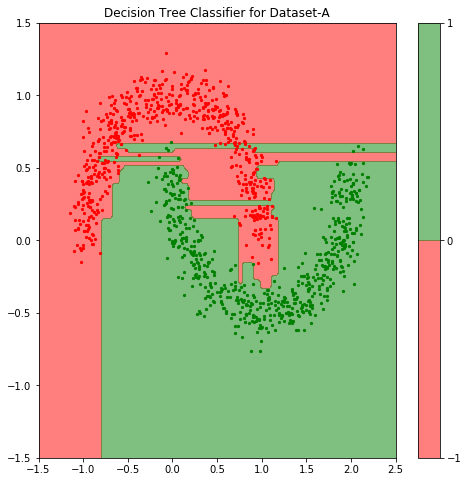

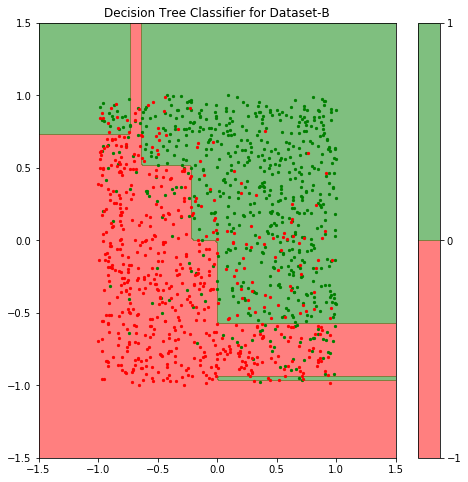

In [22]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
##====== plotting ==============================================
data_names = ["./Archive/dataset_A.npz","./Archive/dataset_B.npz"]
DataSet = ['Dataset-A','Dataset-B']
size =[2,51]
for m in range(len(data_names)) :
    data = np.load(data_names[m])
    #print(data['arr_1'])
    X_train_dat = data['arr_0']
    Y_train_dat = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']
    #splitting the data
    X_train = X_train_dat[0:np.int(0.8*np.shape(X_train_dat)[0])]
    Y_train = Y_train_dat[0:np.int(0.8*np.shape(Y_train_dat)[0])]
    X_valid = X_train_dat[np.int(0.8*np.shape(X_train_dat)[0]):]
    Y_valid = Y_train_dat[np.int(0.8*np.shape(Y_train_dat)[0]):]

    X_train_plus = np.array([X_train_dat[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_minus = np.array([X_train_dat[i] for i in range(len(Y_train)) if Y_train[i]==-1])
    
    
    # limits for plotting
    max_0  = round(np.max(X_train_dat[:,0]))+0.5
    min_0  = round(np.min(X_train_dat[:,0]))-0.5
    lim_0  = np.linspace(min_0,max_0,100)
    max_1   = round(np.max(X_train_dat[:,1]))+0.5
    min_1   = round(np.min(X_train_dat[:,1]))-0.5
    lim_1  = np.linspace(min_1,max_1,100)
    
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)
    
    Y_test_gr_lin = np.zeros(X_test_1.shape)
    no_node = 0;
    node_size =size[m]
    tree = {};
    learn_tree(node_size, data);
    # total X_test
    X_test_tot = np.array([])
    for i in range(Y_test_gr_rbf.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_rbf.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        #Y_test_gr_rbf[i,:] = train_pred_logistic_regression(X_train,Y_train,X_test_gr,kernel = 'rbf',kernel_param =best_ker_par,reg_param = best_reg_par)
        if(i ==0) :
            X_test_tot = X_test_gr
        else :
            X_test_tot = np.concatenate((X_test_tot,X_test_gr))
    #Y_test_gr = [predict(X_test[j]) for j in range(len(X_test))]
    Y_test_gr = np.zeros(X_test_tot.shape[0])
    for j in range(len(X_test_tot)):
        Y_test_gr[j] = predict(X_test_tot[j])
        
    Y_test_gr_dec = np.reshape(Y_test_gr,X_test_1.shape)
    plt.figure(figsize=(8,8))
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_dec,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.title('Decision Tree Classifier '+'for '+ str(DataSet[m]))
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d) 


# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features taken per data=0.5).  Choose the number of trees to add in the forest by using a validation set. (You may use sklearn decision tree function, if you want)

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the via using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set (A,B,C,D) report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions (datasets A,B), also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

In [7]:
np.random.seed(1)
# CodeWrite cell
# Write Random Forest classifier assuming access to a decision tree learner, 
# write code for choosing number of trees
# write only functions here
def RandomForestClassifier(X_train,Y_train,X_test,a = 0.5,b =0.5,n=100,node_size =2):
    d = np.shape(X_train)[1]  # total number of features
    m = np.shape(X_train)[0]  # total number of training samples
    dta = np.concatenate((X_train,Y_train[:,None]),axis =1)
    #print(dta)
    a = int(1/a)
    b = int(1/b)
    y_clf_pr = np.zeros((np.shape(X_test)[0],n))
    training_subset_tot = np.zeros((n,m//a))
    tr_features_tot = np.zeros((n,d//b))
    for i in range(n):
        feature = np.random.choice(d,d//b,replace=False)
        tr_features_tot[i,:] = feature
        clf = DecisionTreeClassifier(min_samples_split = node_size)
        #np.random.seed(i)
        index = np.random.choice(m, m//b , replace=False)
        training_subset_tot[i,:] = index
        temp_data = np.array([dta[j,:] for j in index])
        temp_data_fin = temp_data[:,feature]
        #print(index.shape)
        #print(temp_data)
        #print(training_subset_tot)
        #print(feature)
        clf.fit(temp_data_fin,temp_data[:,d])
        y_clf_pr[:,i] = clf.predict(X_test[:,feature])
    y_pred = np.median(y_clf_pr,axis=1)
    return(y_pred,training_subset_tot,tr_features_tot)

def choose_tree_number(X_train,Y_train,X_valid,y_valid):
    trees_range = np.arange(2,150)
    corr_pred = 0
    best_trees = 0
    for tree in trees_range :
        y_pred,tr_s,tr_f = RandomForestClassifier(X_train,Y_train,X_valid,n = tree)
        temp = np.count_nonzero((y_pred-Y_valid == 0))
        if(temp > corr_pred):
            corr_pred = temp
            best_trees = tree
    return(best_trees)



In [8]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.

    
data_names = ["./Archive/dataset_A.npz","./Archive/dataset_B.npz","./Archive/dataset_C.npz","./Archive/dataset_D.npz"];
name_print = ['DataSet-A', 'DataSet-B', 'DataSet-C', 'DataSet-D'];
for i in range(len(data_names)) :
    data_name = data_names[i];
    data = np.load(data_name);
    #print(data['arr_1'])
    X_train_dat = data['arr_0']
    Y_train_dat = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']
    #splitting the data
    X_train = X_train_dat[0:np.int(0.8*np.shape(X_train_dat)[0])]
    Y_train = Y_train_dat[0:np.int(0.8*np.shape(Y_train_dat)[0])]
    X_valid = X_train_dat[np.int(0.8*np.shape(X_train_dat)[0]):]
    Y_valid = Y_train_dat[np.int(0.8*np.shape(Y_train_dat)[0]):] 
    
    print(name_print[i])
    
    best_tree_size = choose_tree_number(X_train,Y_train,X_valid,Y_valid)
    
    print("Best Tree Size " +": "+ str(best_tree_size));
    
    # testing accuracy and zero-error

    te_y_pred,tr_sub,tr_fea = RandomForestClassifier(X_train_dat,Y_train_dat,X_test,n= best_tree_size)
    print("testing accuracy "+ " = ",np.count_nonzero((te_y_pred-Y_test)==0)/len(Y_test));
    print("test Zero-One Error for " + name_print[i] + " = ",np.count_nonzero((te_y_pred-Y_test)!=0)/len(Y_test));
    
    # training zero-error
    tr_y_pred,tr_sub,tr_fea = RandomForestClassifier(X_train_dat,Y_train_dat,X_train_dat,n= best_tree_size)
    print("training accuracy for " +" = ",np.count_nonzero((tr_y_pred-Y_train_dat)==0)/len(Y_train_dat))
    print("train Zero-One Error for " + " = ",np.count_nonzero((tr_y_pred-Y_train_dat)!=0)/len(Y_train_dat))
    print()

DataSet-A
Best Tree Size : 111
testing accuracy  =  0.906
test Zero-One Error for DataSet-A =  0.094
training accuracy for  =  0.9986666666666667
train Zero-One Error for  =  0.0013333333333333333

DataSet-B
Best Tree Size : 103
testing accuracy  =  0.658
test Zero-One Error for DataSet-B =  0.342
training accuracy for  =  0.9946666666666667
train Zero-One Error for  =  0.005333333333333333

DataSet-C
Best Tree Size : 33
testing accuracy  =  0.9696969696969697
test Zero-One Error for DataSet-C =  0.030303030303030304
training accuracy for  =  0.9993333333333333
train Zero-One Error for  =  0.0006666666666666666

DataSet-D
Best Tree Size : 9
testing accuracy  =  0.9526627218934911
test Zero-One Error for DataSet-D =  0.047337278106508875
training accuracy for  =  0.99
train Zero-One Error for  =  0.01



TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

| Random Forest | Tree_Size | Train-Error | Test-Error |
|---------------|:---------:|-------------|-----------:|
| Data-Set-A    |    147    | 0.06        |    10.6    |
| Data-Set-B    |     90    | 0.6         |     36     |
| Data-Set-C    |     23    | 0.13        |    5.05    |
| Data-Set-D    |     13    | 0.75        |    4.73    |

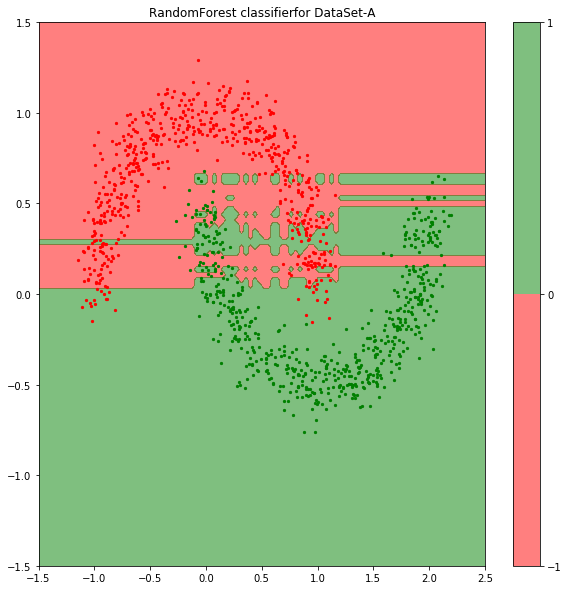

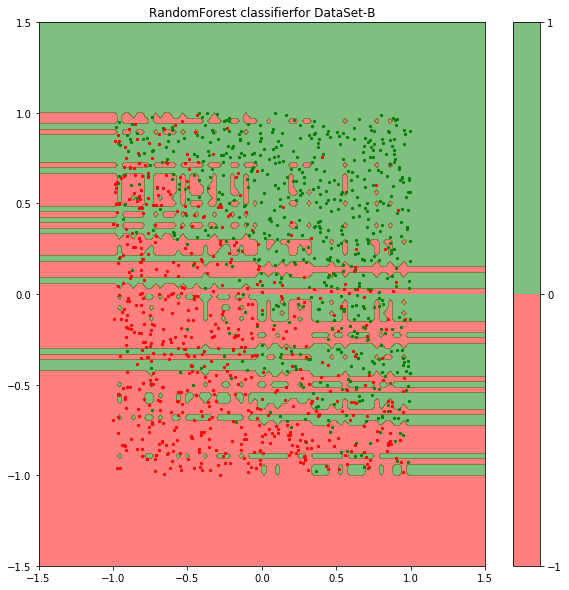

In [10]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
    
##====== plotting ==============================================

data_names = ["./Archive/dataset_A.npz","./Archive/dataset_B.npz"];
name_print = ['DataSet-A', 'DataSet-B']
for m in range(len(data_names)) :
    data_name = data_names[m]
    data = np.load(data_name)
    #print(data['arr_1'])
    X_train_dat = data['arr_0']
    Y_train_dat = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']
    #splitting the data
    X_train = X_train_dat[0:np.int(0.8*np.shape(X_train_dat)[0])]
    Y_train = Y_train_dat[0:np.int(0.8*np.shape(Y_train_dat)[0])]
    X_valid = X_train_dat[np.int(0.8*np.shape(X_train_dat)[0]):]
    Y_valid = Y_train_dat[np.int(0.8*np.shape(Y_train_dat)[0]):]

    X_train_plus = np.array([X_train_dat[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_minus = np.array([X_train_dat[i] for i in range(len(Y_train)) if Y_train[i]==-1])
    
    #best_ker_par,best_reg_par = return_best_hyperparam(X_train,Y_train,X_valid,Y_valid)
    best_tree_size = choose_tree_number(X_train,Y_train,X_valid,Y_valid)
    # limits for plotting
    max_0  = round(np.max(X_train_dat[:,0]))+0.5
    min_0  = round(np.min(X_train_dat[:,0]))-0.5
    lim_0  = np.linspace(min_0,max_0,100)
    max_1  = round(np.max(X_train_dat[:,1]))+0.5
    min_1  = round(np.min(X_train_dat[:,1]))-0.5
    lim_1  = np.linspace(min_1,max_1,100)
    
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)
    
    Y_test_gr_rbf = np.zeros(X_test_1.shape)
    
    # total X_test
    X_test_tot = np.array([])
    for i in range(Y_test_gr_rbf.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_rbf.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        #Y_test_gr_rbf[i,:] = train_pred_logistic_regression(X_train,Y_train,X_test_gr,kernel = 'rbf',kernel_param =best_ker_par,reg_param = best_reg_par)
        if(i ==0) :
            X_test_tot = X_test_gr
        else :
            X_test_tot = np.concatenate((X_test_tot,X_test_gr))
            
    Y_test_gr,tr_sub,tr_features = RandomForestClassifier(X_train,Y_train,X_test_tot,n = best_tree_size)
    Y_test_gr_rbf = np.reshape(Y_test_gr,X_test_1.shape)
    plt.figure(figsize=(10,10))
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_rbf,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.title('RandomForest classifier'+'for '+ name_print[m])
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d)